# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?

  The paper is about data tidying, which is a component of data cleaning.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

  It is intended to accomplish facilitation of initial data analysis & exploration, and simplification of the development of data analysis tools.
  
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

  The first sentence compares messy data sets to families. Similarly to how each family faces their own unique problems and dynamic, every messy data set has their own unique ways of being messy.

  The second sentence means that it's easy to understand the structure of a given dataset by looking at its variables and observations, but it is harder to understand what certain variables or observation rows can represent, or how they are measured. It can be overall harder to understand what story a dataset is trying to tell.


  4. Read Section 2.2. How does Wickham define values, variables, and observations?

  values: numbers (quantitative) or strings (qualitative); they are organized in two ways

  variables: contains all values that measure the same underlying attribute across units

  observations: contains all values measured on the same unit across attributes


  5. How is "Tidy Data" defined in section 2.3?

  Tidy data maps the meaning of a dataset to its structure
  Tidy Data must include the following:
  a) each variable forms a column
  b) each observation forms a row
  c) each type of observational unit forms a table


  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

  5 most common problems with messy data sets:
  a) Column headers are values, not variable names.
  b) Multiple variables are stored in one column.
  c) Variables are stored in both rows and columns.
  d) Multiple types of observational units are stored in the same table.
  e) A single observational unit is stored in multiple tables.

  Why table 4 is messy:
  a) the column headers are values instead of variable names (such as, income)
  b) the variables form both rows and columns
  c) the observation rows are unclear - we aren't sure if it represents frequency, so that's why a frequency column was made


  "Melting" a dataset turns columns into rows.


  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

  Table 12 combined the year and month columns in order to get rid of observations that are null so it can be cleaner. So there aren't any null entries in the table 12 so it's easier to read.

  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

  

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

After coercion: 
 count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 

Total Missings: 
 0 



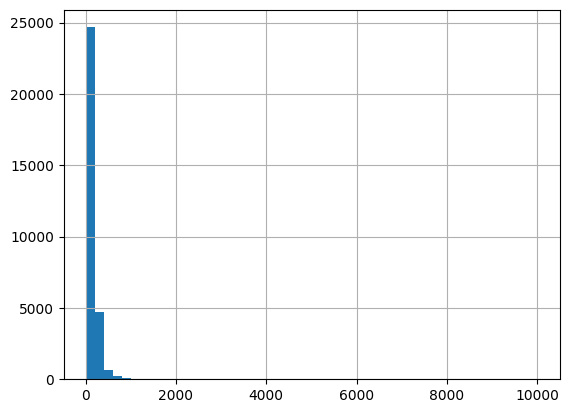

In [23]:
# QUESTION 1

import pandas as pd
import numpy as np
url="https://raw.githubusercontent.com/DS3001/assignment2/main/data/airbnb_hw.csv"
df = pd.read_csv(url,low_memory=False)
df['Price'] = df['Price'].str.replace(",", "") # remove commas in numbers
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') # Coerce the price variable to numeric

# How to create a missing value dummy:
df['Price'+'_nan'] = df['Price'].isnull() # Equals 1 if missing, 0 if non-null

# After coercion:
print('After coercion: \n', df['Price'].describe(),'\n') # Describe the numeric variable
df['Price'].hist(bins = 50) # Histogram of the variable values
print('Total Missings: \n', sum(df['Price'+'_nan']),'\n') # How many missing values are there?



# I removed the "," from the values in the Price column because if it was there,
# then the values would read as characters instead of numeric values. Also,
# if the "," was there, I wouldn't be able to conduct any computations because
# it isn't numeric. There are 0 missing values. When a price goes over 999 dollars,
# the format of a thousands value number does not include a comma. So instead of
# a number having a comma like 10,000, it would be formatted as 10000.000000.

In [10]:
# QUESTION 2
import numpy as np
url='https://raw.githubusercontent.com/DS3001/assignment2/main/data/sharks.csv'
df = pd.read_csv(url,low_memory=False)
print(df['Type'].unique(), '\n')
df['Type'] = df['Type'].replace(' ',np.nan) # replacing nan column
print(df['Type'].value_counts(), '\n')

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg'] 

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: Type, dtype: int64 



In [14]:
# Question 3
url='https://raw.githubusercontent.com/DS3001/EDA/main/data/pretrial_data.csv'
df = pd.read_csv(url,low_memory=False)
## from the lecture
df = df.rename(columns = {'BondAmountAtInitialContact':'bond',
                    'Defendant_IndigencyStatus':'is_poor',
                    'CaseType_MostSerChargeinContactEvent_regardlessofFinalDisp':'case_type',
                    'WhetherDefendantWasReleasedPretrial':'released'}) # Rename variables


**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.